In [1]:
library(ggplot2)
library(UpSetR)
library(ggpubr)
library("tidyr")
library('dplyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
theme_LFE <- function(){ 
    font <- "Helvetica Neue"   #assign font family up front
    theme_minimal() %+replace%    #replace elements we want to change
    theme(
      panel.grid.major = element_blank(),    #strip major gridlines
      panel.grid.minor = element_blank(),    #strip minor gridlines
     text = element_text(size = 20),
      axis.text.y = element_text(size=16, 
                                color="black", 
                                angle=0),
     axis.text.x = element_text(
                                size=16, 
                                color="black", 
                                angle=0), 
     #axis.line = element_line(color="black"),
     axis.line = element_blank(),
     panel.border = element_rect(colour = 'black', fill = NA, linewidth = 1),

     axis.ticks = element_line(color = 'black', linewidth = 1),
     axis.ticks.length=unit(10, "pt"),
        legend.title.align=0,
     legend.text = element_text(
                                size=16, 
                                color="black", 
                                angle=0),
     legend.title = element_text(
                                size=16, 
                                color="black", 
                                angle=0),
      legend.background = element_rect(fill = "transparent",colour = NA),
      panel.background = element_rect(fill = "transparent",colour = NA), # or theme_blank()
      plot.background = element_rect(fill = "transparent",colour = NA)
    )
}

# Downsample - 1k, 2k, 3k, 4k Reads per cell

In [2]:
# consensus.count.matrix.No <- read.table('../Exp2_downsample/NoEnrichment/consensus.count.matrix', header = T)
# colnames(consensus.count.matrix.No)[1] <- 'gRNA'
consensus.count.matrix.5 <- read.table('../Exp2_downsample/5ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.5)[1] <- 'gRNA'
consensus.count.matrix.10 <- read.table('../Exp2_downsample/10ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.10)[1] <- 'gRNA'
consensus.count.matrix.20 <- read.table('../Exp2_downsample/20ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.20)[1] <- 'gRNA'
consensus.count.matrix.30 <- read.table('../Exp2_downsample/30ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.30)[1] <- 'gRNA'
consensus.count.matrix.40 <- read.table('../Exp2_downsample/40ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.40)[1] <- 'gRNA'
consensus.count.matrix.50 <- read.table('../Exp2_downsample/50ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.50)[1] <- 'gRNA'
consensus.count.matrix.60 <- read.table('../Exp2_downsample/60ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.60)[1] <- 'gRNA'
consensus.count.matrix.70 <- read.table('../Exp2_downsample/70ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.70)[1] <- 'gRNA'
consensus.count.matrix.80 <- read.table('../Exp2_downsample/80ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.80)[1] <- 'gRNA'
consensus.count.matrix.90 <- read.table('../Exp2_downsample/90ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.90)[1] <- 'gRNA'
consensus.count.matrix.100 <- read.table('../Exp2_downsample/100ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.100)[1] <- 'gRNA'
consensus.count.matrix.120 <- read.table('../Exp2_downsample/120ReadsPerCell//consensus.count.matrix', header = T)
colnames(consensus.count.matrix.120)[1] <- 'gRNA'
consensus.count.matrix.140 <- read.table('../Exp2_downsample/140ReadsPerCell//consensus.count.matrix', header = T)
colnames(consensus.count.matrix.140)[1] <- 'gRNA'
consensus.count.matrix.160 <- read.table('../Exp2_downsample/160ReadsPerCell//consensus.count.matrix', header = T)
colnames(consensus.count.matrix.160)[1] <- 'gRNA'
consensus.count.matrix.180 <- read.table('../Exp2_downsample/180ReadsPerCell//consensus.count.matrix', header = T)
colnames(consensus.count.matrix.180)[1] <- 'gRNA'
consensus.count.matrix.200 <- read.table('../Exp2_downsample/200ReadsPerCell//consensus.count.matrix', header = T)
colnames(consensus.count.matrix.200)[1] <- 'gRNA'
consensus.count.matrix.500 <- read.table('../Exp2_downsample/500ReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.500)[1] <- 'gRNA'
consensus.count.matrix.1k <- read.table('../Exp2_downsample/1kReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.1k)[1] <- 'gRNA'
consensus.count.matrix.2k <- read.table('../Exp2_downsample/2kReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.2k)[1] <- 'gRNA'
consensus.count.matrix.3k <- read.table('../Exp2_downsample/3kReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.3k)[1] <- 'gRNA'
consensus.count.matrix.4k <- read.table('../Exp2_downsample/4kReadsPerCell/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.4k)[1] <- 'gRNA'
consensus.count.matrix.5k <- read.table('../exp2_deep/re-run/consensus.count.matrix', header = T)
colnames(consensus.count.matrix.5k)[1] <- 'gRNA'

In [3]:
rm(consensus.count.matrix.list)
consensus.count.names <- ls(pattern = 'consensus.count.matrix')

Warning message in rm(consensus.count.matrix.list):
“object 'consensus.count.matrix.list' not found”


In [4]:
consensus.count.matrix.list <- lapply(consensus.count.names, function(x) get(x))                   

In [5]:
length(consensus.count.matrix.list)
names(consensus.count.matrix.list) <- consensus.count.names

[1] 22

In [6]:
#lapply(consensus.count.matrix.list, ncol)
#lapply(consensus.count.matrix.list, function(x) summary(colSums(x[,-1])))

In [7]:
order_object <- c('consensus.count.matrix.5',
                  'consensus.count.matrix.10', 'consensus.count.matrix.20','consensus.count.matrix.30', 
                       'consensus.count.matrix.40', 'consensus.count.matrix.50','consensus.count.matrix.60',
                      'consensus.count.matrix.70', 'consensus.count.matrix.80','consensus.count.matrix.90',
                      'consensus.count.matrix.100', 'consensus.count.matrix.120','consensus.count.matrix.140',
                      'consensus.count.matrix.160', 'consensus.count.matrix.180','consensus.count.matrix.200',
                      'consensus.count.matrix.500', 'consensus.count.matrix.1k','consensus.count.matrix.2k',
                      'consensus.count.matrix.3k', 'consensus.count.matrix.4k','consensus.count.matrix.5k')

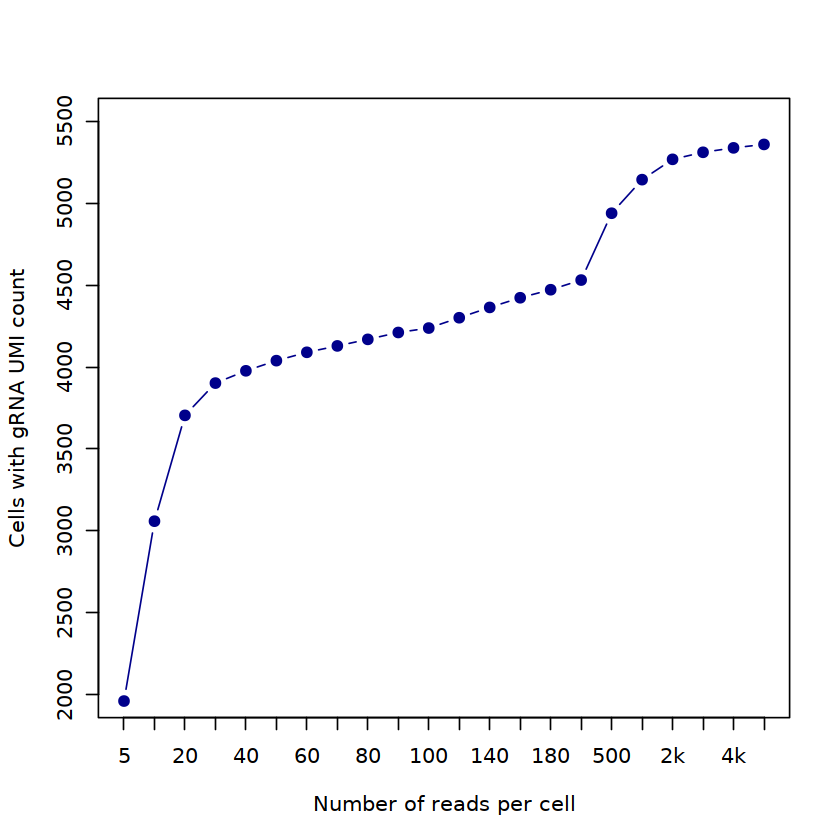

In [8]:
nr_cells <- unlist(lapply(consensus.count.matrix.list, function(x) ncol(x)-1))
nr_cells <- nr_cells[order_object]
plot(x = nr_cells, pch = 19, type = "b", col = 'darkblue',
     xaxt = "n", xlab = 'Number of reads per cell', ylab = 'Cells with gRNA UMI count',ylim =c(2000,5500))
axis(1, at=1:22, labels=sub('consensus.count.matrix.','',names(nr_cells)))

In [9]:
counts.colSum.df <- as.data.frame(do.call(bind_rows, lapply(consensus.count.matrix.list, function(x) colSums(x[,-1]))))
                                         

In [10]:
counts.colSum.df$exp <- names(consensus.count.matrix.list)
counts.colSum.df[is.na(counts.colSum.df)] <- 0
counts.colSum.long <- gather(counts.colSum.df, key = 'cb', value = 'total_counts', -exp)

In [11]:
head(counts.colSum.long %>% group_by(exp) %>% summarise(n = n(), median = median(total_counts)))

exp,n,median
<chr>,<int>,<dbl>
consensus.count.matrix.10,5359,1
consensus.count.matrix.100,5359,17
consensus.count.matrix.120,5359,19
consensus.count.matrix.140,5359,20
consensus.count.matrix.160,5359,22
consensus.count.matrix.180,5359,23


In [12]:
counts.colSum.long$exp <- factor(counts.colSum.long$exp, levels = c('consensus.count.matrix.5',
                    'consensus.count.matrix.10', 'consensus.count.matrix.20','consensus.count.matrix.30', 
                       'consensus.count.matrix.40', 'consensus.count.matrix.50','consensus.count.matrix.60',
                      'consensus.count.matrix.70', 'consensus.count.matrix.80','consensus.count.matrix.90',
                      'consensus.count.matrix.100', 'consensus.count.matrix.120','consensus.count.matrix.140',
                      'consensus.count.matrix.160', 'consensus.count.matrix.180','consensus.count.matrix.200',
                      'consensus.count.matrix.500', 'consensus.count.matrix.1k','consensus.count.matrix.2k',
                      'consensus.count.matrix.3k', 'consensus.count.matrix.4k','consensus.count.matrix.5k'))

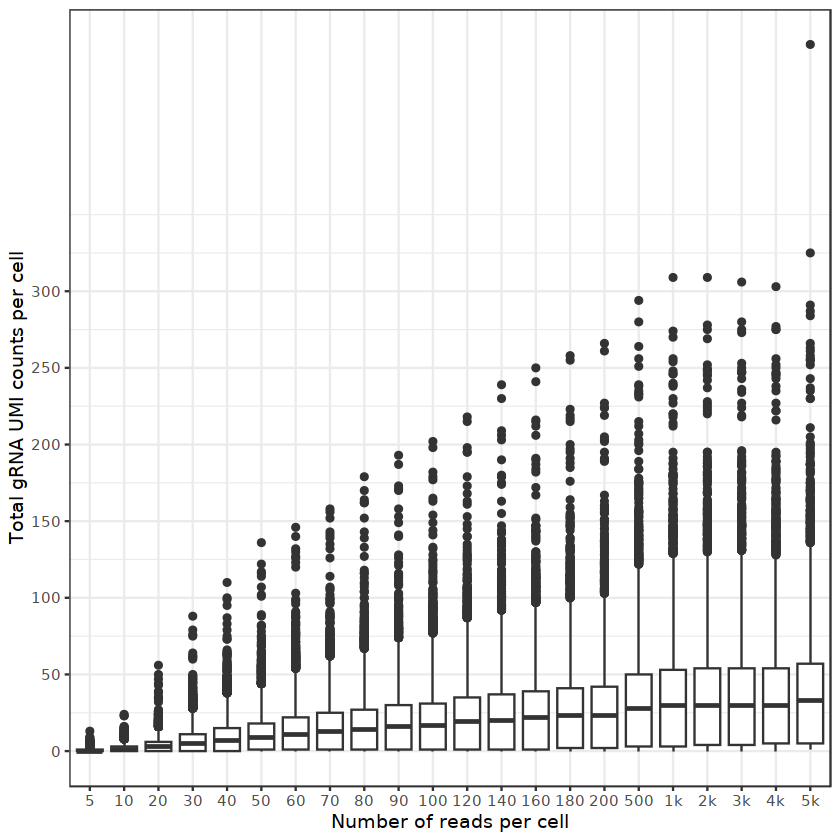

In [13]:
# total counts per cell
ggplot(counts.colSum.long, aes(x = exp, y = total_counts))+geom_boxplot()+theme_bw()+xlab(label = '')+
scale_x_discrete(name = 'Number of reads per cell', labels = sub('consensus.count.matrix.','',order_object))+
scale_y_continuous(name = 'Total gRNA UMI counts per cell', breaks = seq(0,300,50))

Saturation:

In [14]:
saturations <- c(16.2,23.2,34.2,42.6,49.3,54.6,59.0,62.6,65.7,68.2,70.5,74.2,77.0,79.3,81.2,82.7,92.3,95.9,97.7,98.4,98.7,98.9)
names(saturations) <- order_object


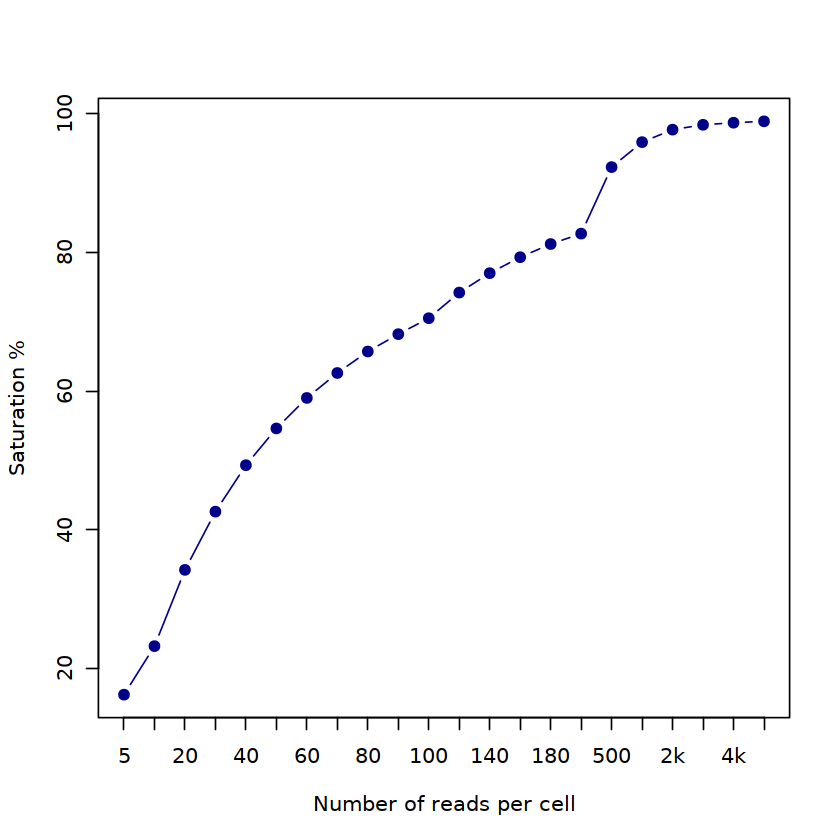

In [15]:
# 'downsample_saturation_index.pdf'
plot(saturations, pch = 19, type = "b", col = 'darkblue',xaxt = "n", xlab = 'Number of reads per cell', ylab = 'Saturation %')
axis(1, at=1:22, labels=sub('consensus.count.matrix.','',names(nr_cells)))


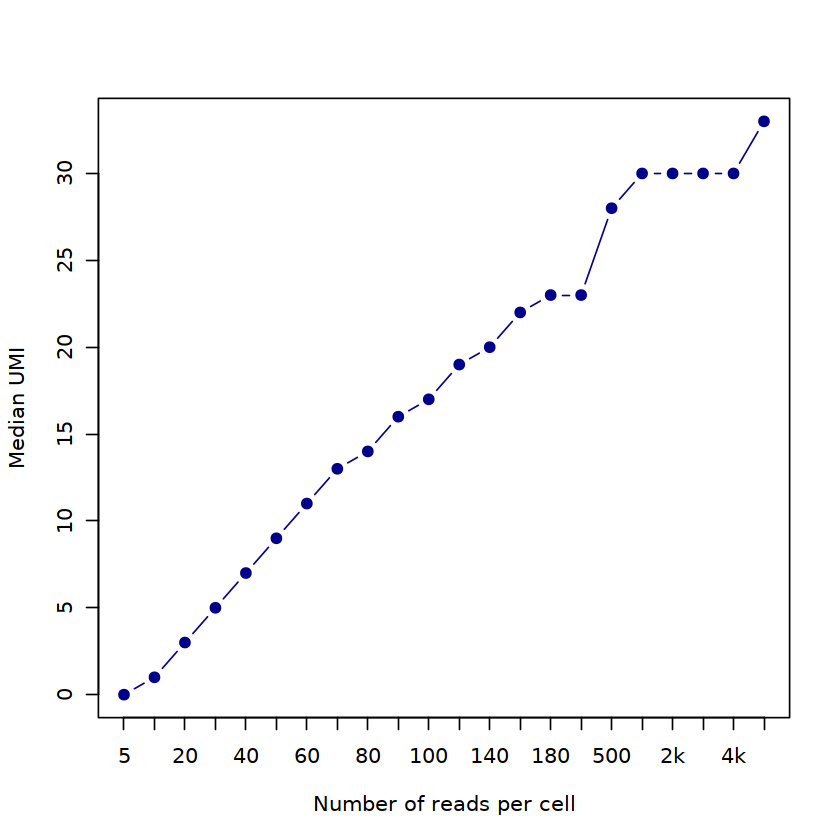

In [16]:
nr_median_umi <- counts.colSum.long %>% group_by(exp) %>% summarise(n = n(), median = median(total_counts))
nr_median_umi <- as.data.frame(nr_median_umi)
nr_median_umi$downsample <- sub('consensus.count.matrix.', '', nr_median_umi$exp)
plot(nr_median_umi$median, pch = 19, type = "b", col = 'darkblue',xaxt = "n", xlab = 'Number of reads per cell', ylab = 'Median UMI')
axis(1, at=1:22, labels=sub('consensus.count.matrix.','',names(nr_cells)))

In [22]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/custom/apply_to_exp2_deep/barcodes.tsv', header = FALSE)
#filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)

In [23]:
rm(filtered_barcodes_merged.all)

In [24]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_5/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/5ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '5'
filtered_barcodes_merged.all <- filtered_barcodes_merged

In [25]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_10/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/10ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '10'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [26]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_20/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/20ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '20'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [27]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_30/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/30ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '30'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [28]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_40/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/40ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '40'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [29]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_50/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/50ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '50'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [30]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_60/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/60ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '60'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [31]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_70/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/70ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '70'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [32]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_80/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/80ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '80'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [33]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_90/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/90ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '90'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [34]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_100/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/100ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '100'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [35]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_500/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/500ReadsPerCell/cells.gRNA.txt', 
                          header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                          col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                   cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '500'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [36]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_1k/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/1kReadsPerCell/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                         col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                  cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '1k'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [37]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_2k/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/2kReadsPerCell/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                         col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                  cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '2k'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [38]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_3k/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/3kReadsPerCell/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                         col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                  cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '3k'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [39]:
protospacer_calls_per_cell <-read.csv('../../public_data/Exp2_downsample/feature_barcoding_analysis/Downsample_4k/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../Exp2_downsample/4kReadsPerCell/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                         col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                  cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '4k'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)


In [40]:
protospacer_calls_per_cell <-read.csv('../../../../feature_barcoding_analysis/exp2_deep/exp2_deep_run_on_node/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
cells.gRNA <- read.table('../exp2_deep/re-run/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,
                         col.names = c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT'))
    
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))

filtered_barcodes_seurat <- merge(filtered_barcodes, protospacer_calls_per_cell[,c(1,2)], by.x = 'V1', by.y = 'cell_barcode', all.x = TRUE)

filtered_barcodes_merged <- merge(filtered_barcodes_seurat, 
                                  cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
colnames(filtered_barcodes_merged) <- c('cb', 'seurat','girafr')
filtered_barcodes_merged[is.na(filtered_barcodes_merged)] <- 0
filtered_barcodes_merged$seurat <- as.factor(filtered_barcodes_merged$seurat)
filtered_barcodes_merged$girafr <- as.factor(filtered_barcodes_merged$girafr)
filtered_barcodes_merged$downsample <- '5k'
filtered_barcodes_merged.all <- rbind(filtered_barcodes_merged.all, filtered_barcodes_merged)

In [41]:
filtered_barcodes_merged.all.long <-  gather(filtered_barcodes_merged.all, key = 'method', value = 'num_features', -c(cb,downsample))


In [42]:
filtered_barcodes_merged.all.long$downsample <- factor(filtered_barcodes_merged.all.long$downsample, 
                                                       levels = c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k'))


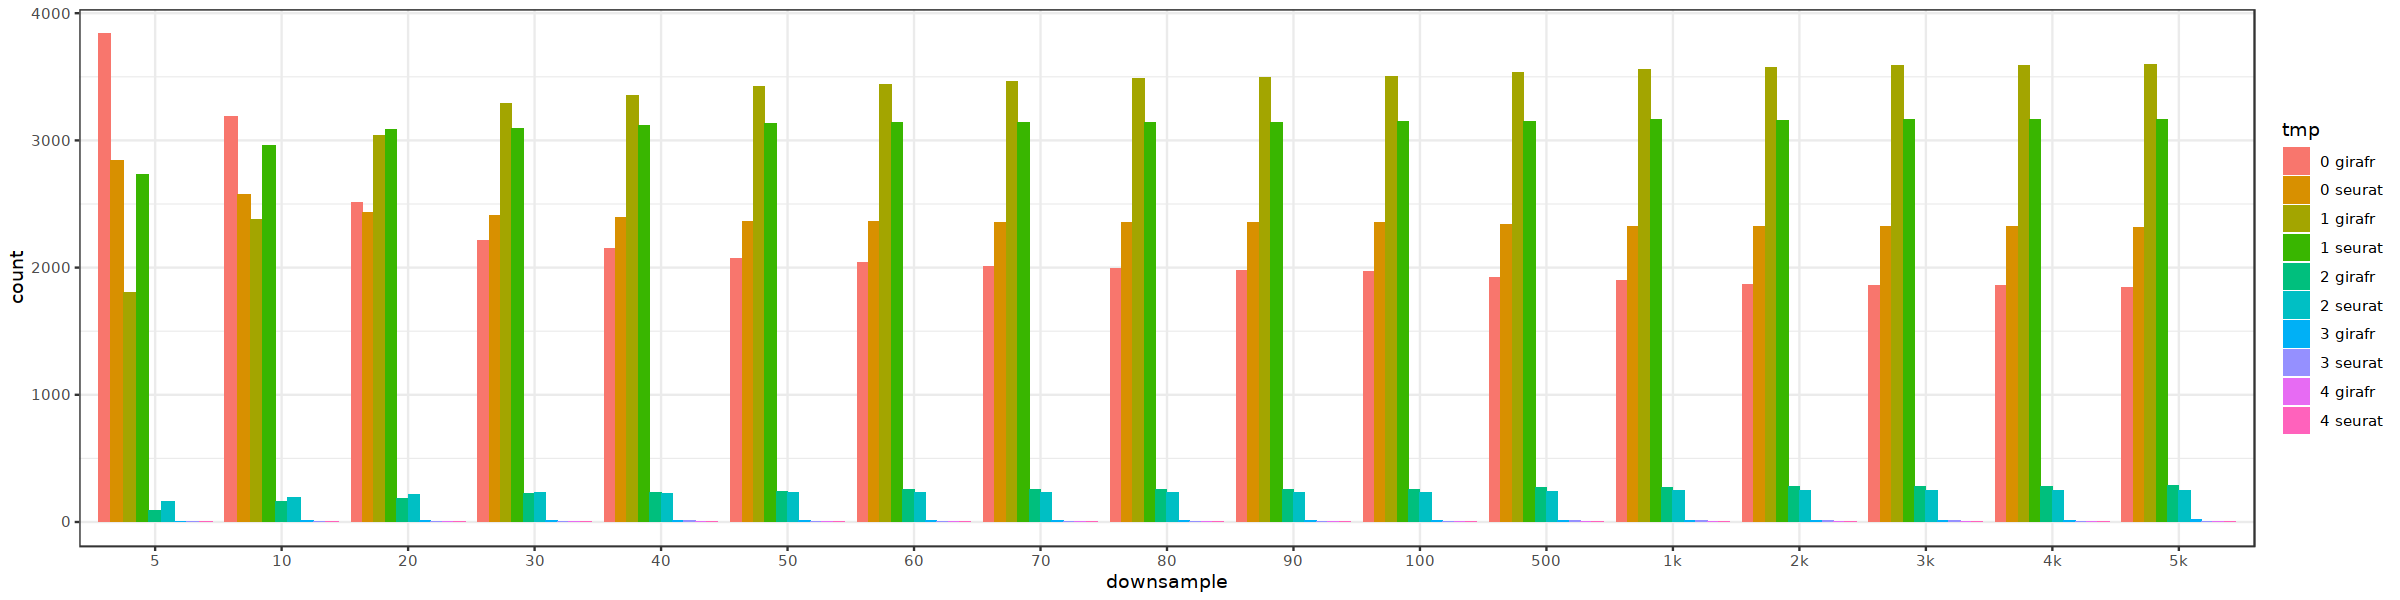

In [43]:
tmp <- filtered_barcodes_merged.all.long
tmp$tmp <- paste(tmp$num_features, tmp$method)
options(repr.plot.width=20, repr.plot.height=5)
ggplot(tmp, aes(x=downsample, fill = tmp))+geom_bar(position="dodge")+
theme_bw()
options(repr.plot.width=10, repr.plot.height=10)

When only 10 reads / cell, GIRFAR gives higher zero gRNA assignment.

In [44]:
head(filtered_barcodes_merged.all)

,cb,seurat,girafr,downsample
,<chr>,<fct>,<fct>,<chr>
1,AAACCCAAGGTTCCGC-1,0,0,5
2,AAACCCAAGTAGCATA-1,1,1,5
3,AAACCCACATCGCTAA-1,1,2,5
4,AAACCCAGTATTTCGG-1,0,0,5
5,AAACCCATCAAGAGGC-1,1,1,5
6,AAACCCATCCACCTGT-1,1,1,5


In [45]:
filtered_barcodes_merged.all$seurat2 <- as.character(filtered_barcodes_merged.all$seurat)
filtered_barcodes_merged.all$seurat2[which(!filtered_barcodes_merged.all$seurat2 %in% c('0','1','2'))] <- '>2'
filtered_barcodes_merged.all$seurat2 <- factor(filtered_barcodes_merged.all$seurat2, levels = c('0','1','2','>2'))

filtered_barcodes_merged.all$girafr2 <- as.character(filtered_barcodes_merged.all$girafr)
filtered_barcodes_merged.all$girafr2[which(!filtered_barcodes_merged.all$girafr2 %in% c('0','1','2'))] <- '>2'
filtered_barcodes_merged.all$girafr2 <- factor(filtered_barcodes_merged.all$girafr2, levels = c('0','1','2','>2'))

In [46]:
filtered_barcodes_merged.5k <- filtered_barcodes_merged.all[which(filtered_barcodes_merged.all$downsample == '5k'),]

In [47]:
filtered_barcodes_merged.all.compare <- merge(filtered_barcodes_merged.all, suffixes = c('','.5k'),
                                              filtered_barcodes_merged.5k, by = 'cb', all.x = TRUE)


In [48]:
head(filtered_barcodes_merged.all.compare)

,cb,seurat,girafr,downsample,seurat2,girafr2,seurat.5k,girafr.5k,downsample.5k,seurat2.5k,girafr2.5k
,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>
1,AAACCCAAGGTTCCGC-1,0,0,5,0,0,0,0,5k,0,0
2,AAACCCAAGGTTCCGC-1,0,0,40,0,0,0,0,5k,0,0
3,AAACCCAAGGTTCCGC-1,0,0,60,0,0,0,0,5k,0,0
4,AAACCCAAGGTTCCGC-1,0,0,100,0,0,0,0,5k,0,0
5,AAACCCAAGGTTCCGC-1,0,0,4k,0,0,0,0,5k,0,0
6,AAACCCAAGGTTCCGC-1,0,0,90,0,0,0,0,5k,0,0


In [49]:
filtered_barcodes_merged.all.compare$seurat.compare <- 
filtered_barcodes_merged.all.compare$seurat == filtered_barcodes_merged.all.compare$seurat.5k
filtered_barcodes_merged.all.compare$girafr.compare <- 
filtered_barcodes_merged.all.compare$girafr == filtered_barcodes_merged.all.compare$girafr.5k
filtered_barcodes_merged.all.compare$seurat.compare2 <- 
filtered_barcodes_merged.all.compare$seurat == filtered_barcodes_merged.all.compare$girafr.5k

In [50]:
head(filtered_barcodes_merged.all.compare)

,cb,seurat,girafr,downsample,seurat2,girafr2,seurat.5k,girafr.5k,downsample.5k,seurat2.5k,girafr2.5k,seurat.compare,girafr.compare,seurat.compare2
,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1,AAACCCAAGGTTCCGC-1,0,0,5,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
2,AAACCCAAGGTTCCGC-1,0,0,40,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
3,AAACCCAAGGTTCCGC-1,0,0,60,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
4,AAACCCAAGGTTCCGC-1,0,0,100,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
5,AAACCCAAGGTTCCGC-1,0,0,4k,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
6,AAACCCAAGGTTCCGC-1,0,0,90,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE


Compare with 5k cell assignment, calculate

In [51]:
table(filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '10'),'seurat.compare'])
table(filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '10'),'girafr.compare'])



FALSE  TRUE 
  323  5421 


FALSE  TRUE 
 1563  4181 

In [52]:
accuracy <- filtered_barcodes_merged.all.compare %>% group_by(downsample) %>% 
summarise(acc.seurat = sum(seurat.compare), acc.girafr = sum(girafr.compare))

accuracy$acc.seurat <- accuracy$acc.seurat/5744
accuracy$acc.girafr <- accuracy$acc.girafr/5744
accuracy <- as.data.frame(accuracy)
accuracy$downsample <- factor(accuracy$downsample, levels = c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k'))
accuracy <- accuracy[order(accuracy$downsample),]

In [53]:
saturations

consensus.count.matrix.5  consensus.count.matrix.10 
                      16.2                       23.2 
 consensus.count.matrix.20  consensus.count.matrix.30 
                      34.2                       42.6 
 consensus.count.matrix.40  consensus.count.matrix.50 
                      49.3                       54.6 
 consensus.count.matrix.60  consensus.count.matrix.70 
                      59.0                       62.6 
 consensus.count.matrix.80  consensus.count.matrix.90 
                      65.7                       68.2 
consensus.count.matrix.100 consensus.count.matrix.120 
                      70.5                       74.2 
consensus.count.matrix.140 consensus.count.matrix.160 
                      77.0                       79.3 
consensus.count.matrix.180 consensus.count.matrix.200 
                      81.2                       82.7 
consensus.count.matrix.500  consensus.count.matrix.1k 
                      92.3                       95.9 
 consensus.count.matrix.2k  consensus.count.matrix.3k 
                      97.7                       98.4 
 consensus.count.matrix.4k  consensus.count.matrix.5k 
                      98.7                       98.9

In [54]:
sort(unique(filtered_barcodes_merged.all.compare$downsample))

[1] "10"  "100" "1k"  "20"  "2k"  "30"  "3k"  "40"  "4k"  "5"   "50"  "500"
[13] "5k"  "60"  "70"  "80"  "90"

In [55]:
order_object <- c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k')

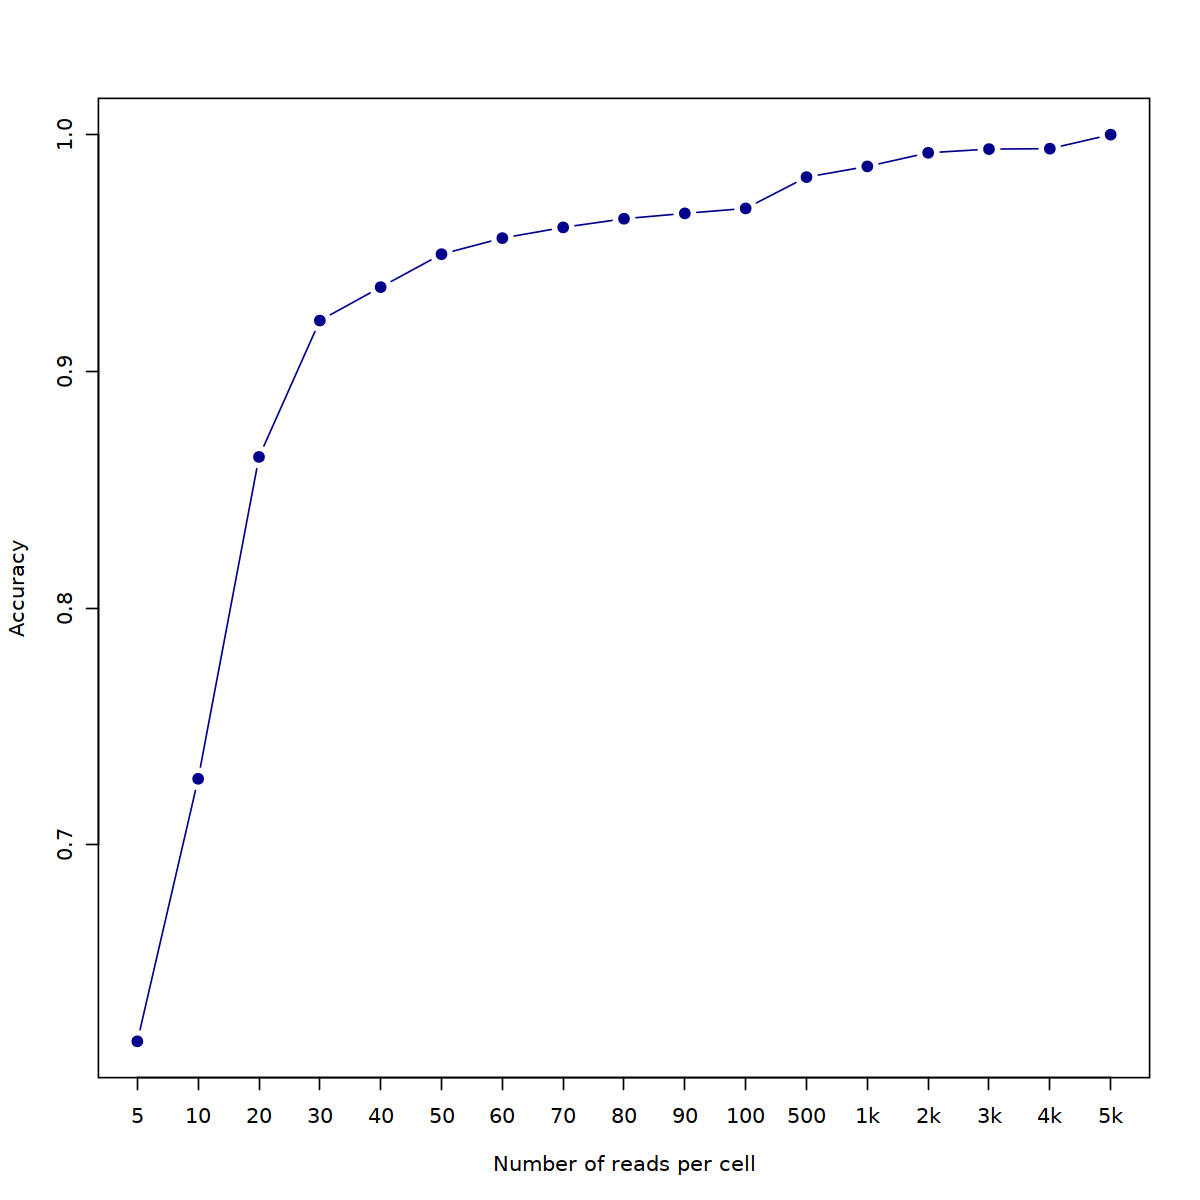

In [56]:
#plot(accuracy$acc.seurat)
#plot(accuracy$acc.girafr)
#pdf('downsample_accuracy_index.pdf')
acc.girafr <- accuracy$acc.girafr
names(acc.girafr) <- order_object
plot(acc.girafr, pch = 19, type = "b", col = 'darkblue', xaxt = "n", xlab = 'Number of reads per cell', ylab = 'Accuracy')
axis(1, at=1:17, labels=sub('consensus.count.matrix.','',names(acc.girafr)))
#dev.off()

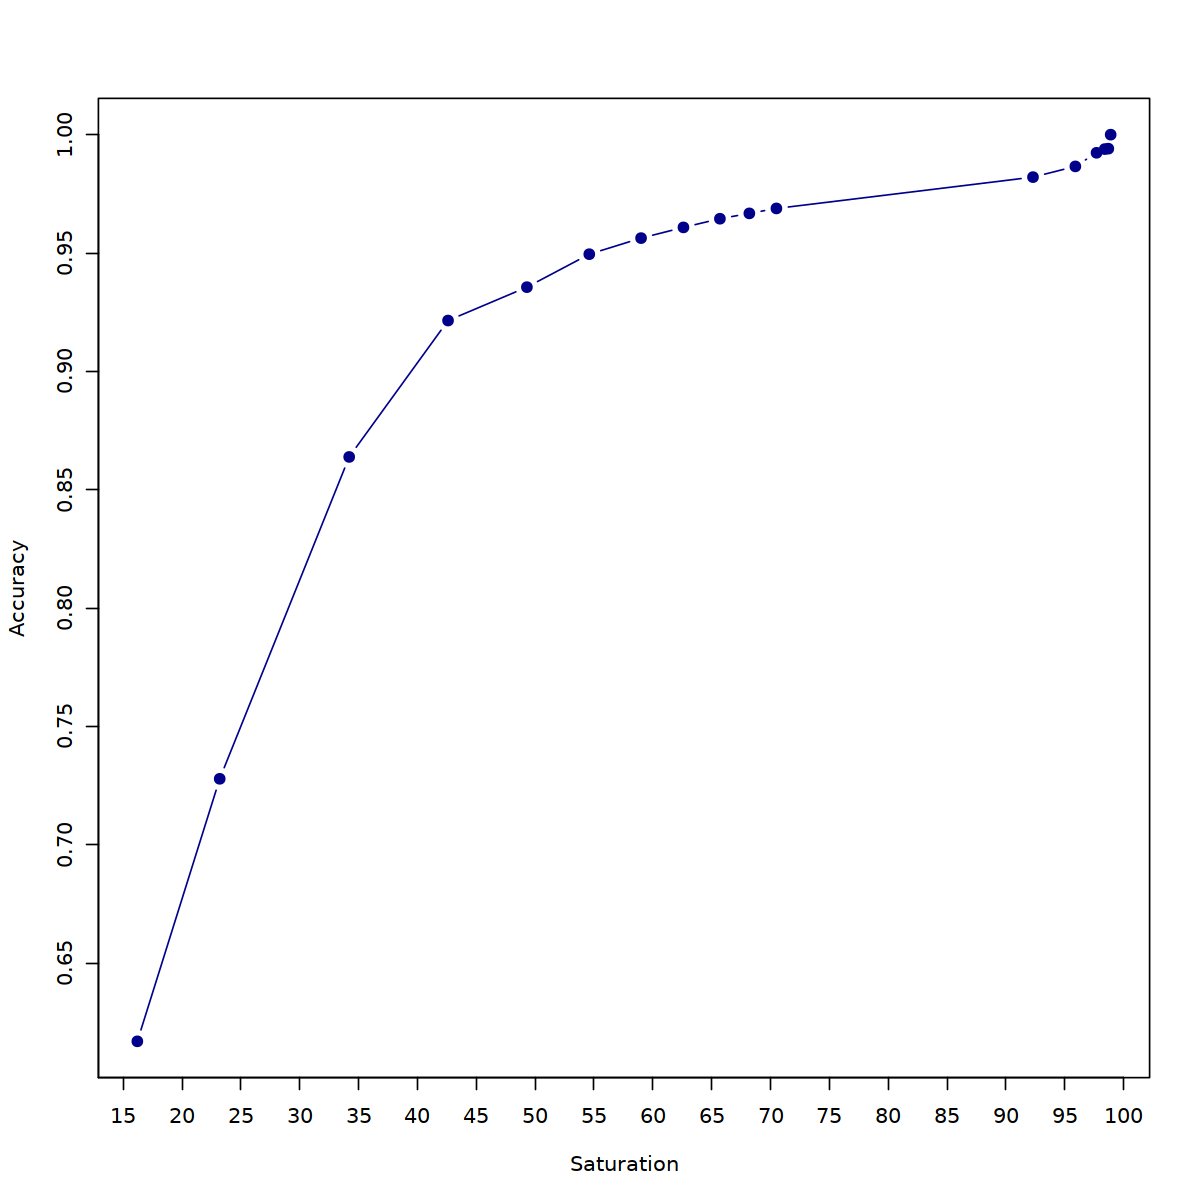

In [57]:
#pdf('downsample_accuracy_saturation.pdf')
plot(saturations[c(1:11,17:22)], acc.girafr, pch = 19, type = "b",xaxt = "n",yaxt = 'n',col = 'darkblue'
     , xlab = 'Saturation', ylab = 'Accuracy')
axis(1, at = seq(10, 100, by = 5))
axis(2, at = seq(0.5, 1, by = 0.05))
#dev.off()

In [60]:
acc.girafr[acc.girafr > 0.8]
saturations[c(1:11,17:22)][acc.girafr > 0.8]
nr_median_umi[c(1:11,17:22)][acc.girafr > 0.8]
acc.girafr[acc.girafr > 0.95]
saturations[c(1:11,17:22)][acc.girafr > 0.95]
nr_median_umi[c(1:11,17:22)][acc.girafr > 0.95]
acc.girafr[acc.girafr > 0.98]
saturations[c(1:11,17:22)][acc.girafr > 0.98]
nr_median_umi[c(1:11,17:22)][acc.girafr > 0.98]

20        30        40        50        60        70        80        90 
0.8638579 0.9214833 0.9355850 0.9495125 0.9563022 0.9608287 0.9644847 0.9667479 
      100       500        1k        2k        3k        4k        5k 
0.9688370 0.9820682 0.9865947 0.9923398 0.9939067 0.9940808 1.0000000

consensus.count.matrix.20  consensus.count.matrix.30 
                      34.2                       42.6 
 consensus.count.matrix.40  consensus.count.matrix.50 
                      49.3                       54.6 
 consensus.count.matrix.60  consensus.count.matrix.70 
                      59.0                       62.6 
 consensus.count.matrix.80  consensus.count.matrix.90 
                      65.7                       68.2 
consensus.count.matrix.100 consensus.count.matrix.500 
                      70.5                       92.3 
 consensus.count.matrix.1k  consensus.count.matrix.2k 
                      95.9                       97.7 
 consensus.count.matrix.3k  consensus.count.matrix.4k 
                      98.4                       98.7 
 consensus.count.matrix.5k 
                      98.9

consensus.count.matrix.20  consensus.count.matrix.30 
                         5                          8 
 consensus.count.matrix.40  consensus.count.matrix.50 
                        11                         13 
 consensus.count.matrix.60  consensus.count.matrix.70 
                        16                         18 
 consensus.count.matrix.80  consensus.count.matrix.90 
                        19                         21 
consensus.count.matrix.100 consensus.count.matrix.500 
                        22                         31 
 consensus.count.matrix.1k  consensus.count.matrix.2k 
                        31                         31 
 consensus.count.matrix.3k  consensus.count.matrix.4k 
                        31                         30 
 consensus.count.matrix.5k 
                        33

60        70        80        90       100       500        1k        2k 
0.9563022 0.9608287 0.9644847 0.9667479 0.9688370 0.9820682 0.9865947 0.9923398 
       3k        4k        5k 
0.9939067 0.9940808 1.0000000

consensus.count.matrix.60  consensus.count.matrix.70 
                      59.0                       62.6 
 consensus.count.matrix.80  consensus.count.matrix.90 
                      65.7                       68.2 
consensus.count.matrix.100 consensus.count.matrix.500 
                      70.5                       92.3 
 consensus.count.matrix.1k  consensus.count.matrix.2k 
                      95.9                       97.7 
 consensus.count.matrix.3k  consensus.count.matrix.4k 
                      98.4                       98.7 
 consensus.count.matrix.5k 
                      98.9

consensus.count.matrix.60  consensus.count.matrix.70 
                        16                         18 
 consensus.count.matrix.80  consensus.count.matrix.90 
                        19                         21 
consensus.count.matrix.100 consensus.count.matrix.500 
                        22                         31 
 consensus.count.matrix.1k  consensus.count.matrix.2k 
                        31                         31 
 consensus.count.matrix.3k  consensus.count.matrix.4k 
                        31                         30 
 consensus.count.matrix.5k 
                        33

500        1k        2k        3k        4k        5k 
0.9820682 0.9865947 0.9923398 0.9939067 0.9940808 1.0000000

consensus.count.matrix.500  consensus.count.matrix.1k 
                      92.3                       95.9 
 consensus.count.matrix.2k  consensus.count.matrix.3k 
                      97.7                       98.4 
 consensus.count.matrix.4k  consensus.count.matrix.5k 
                      98.7                       98.9

consensus.count.matrix.500  consensus.count.matrix.1k 
                        31                         31 
 consensus.count.matrix.2k  consensus.count.matrix.3k 
                        31                         31 
 consensus.count.matrix.4k  consensus.count.matrix.5k 
                        30                         33

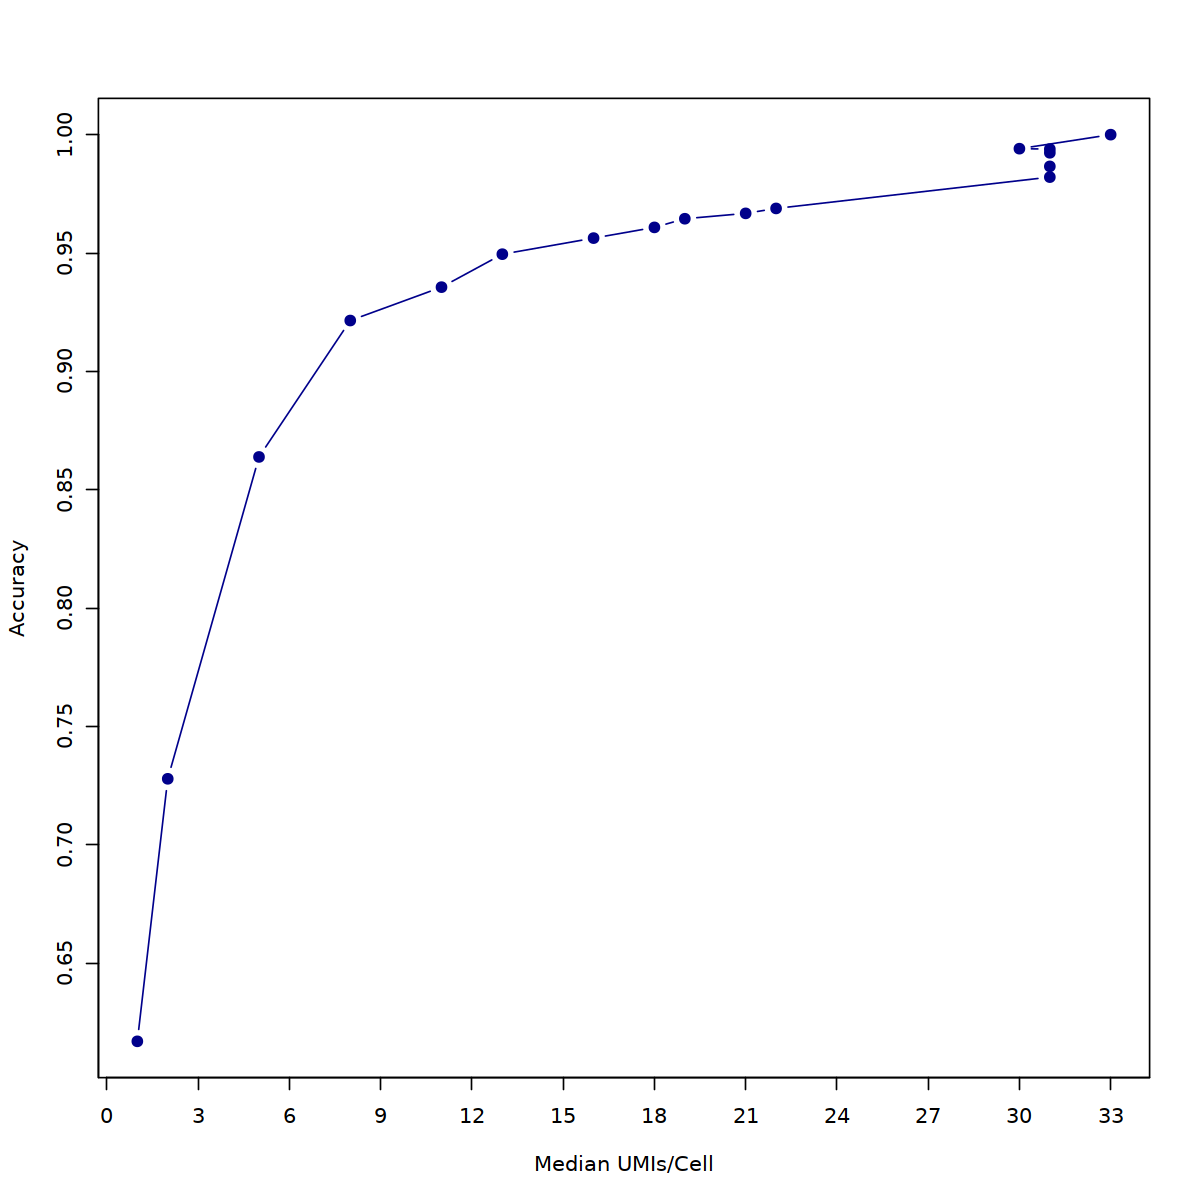

In [61]:
#pdf('downsample_accuracy_medianUMI.pdf')
nr_median_umi <- unlist(lapply(consensus.count.matrix.list, function(x) median(colSums(x[,-1]))))
order_object <- c('consensus.count.matrix.5',
                  'consensus.count.matrix.10', 'consensus.count.matrix.20','consensus.count.matrix.30', 
                       'consensus.count.matrix.40', 'consensus.count.matrix.50','consensus.count.matrix.60',
                      'consensus.count.matrix.70', 'consensus.count.matrix.80','consensus.count.matrix.90',
                      'consensus.count.matrix.100', 'consensus.count.matrix.120','consensus.count.matrix.140',
                      'consensus.count.matrix.160', 'consensus.count.matrix.180','consensus.count.matrix.200',
                      'consensus.count.matrix.500', 'consensus.count.matrix.1k','consensus.count.matrix.2k',
                   'consensus.count.matrix.3k', 'consensus.count.matrix.4k','consensus.count.matrix.5k')

nr_median_umi <- nr_median_umi[order_object]
plot(nr_median_umi[c(1:11,17:22)], acc.girafr, pch = 19, type = "b",xaxt = "n",yaxt = 'n',col = 'darkblue'
     , xlab = 'Median UMIs/Cell', ylab = 'Accuracy')
axis(1, at = seq(0, 40, by = 3))
axis(2, at = seq(0.5, 1, by = 0.05))

# nr_median_umi <- counts.colSum.long %>% group_by(exp) %>% summarise(n = n(), median = median(total_counts))
# plot(nr_median_umi[c(1:11,17:22),]$median, acc.girafr, pch = 19, type = "b",xaxt = "n",yaxt = 'n',col = 'darkblue'
#      , xlab = 'Median UMI/Cell', ylab = 'Accuracy')
# axis(1, at = seq(0, 40, by = 3))
# axis(2, at = seq(0.5, 1, by = 0.05))
                               
#dev.off()

In [62]:
head(filtered_barcodes_merged.all.compare)

,cb,seurat,girafr,downsample,seurat2,girafr2,seurat.5k,girafr.5k,downsample.5k,seurat2.5k,girafr2.5k,seurat.compare,girafr.compare,seurat.compare2
,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1,AAACCCAAGGTTCCGC-1,0,0,5,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
2,AAACCCAAGGTTCCGC-1,0,0,40,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
3,AAACCCAAGGTTCCGC-1,0,0,60,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
4,AAACCCAAGGTTCCGC-1,0,0,100,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
5,AAACCCAAGGTTCCGC-1,0,0,4k,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE
6,AAACCCAAGGTTCCGC-1,0,0,90,0,0,0,0,5k,0,0,TRUE,TRUE,TRUE


In [63]:
filtered_barcodes_merged.all.compare$detected <- FALSE

In [64]:
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '5')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '5'),'cb']) %in% colnames(consensus.count.matrix.list$`consensus.count.matrix.5`)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '40')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '40'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.40)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '60')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '60'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.60)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '100')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '100'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.100)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '4k')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '4k'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.4k)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '90')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '90'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.90)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '50')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '50'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.50)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '500')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '500'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.500)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '5k')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '5k'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.5k)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '1k')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '1k'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.1k)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '80')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '80'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.80)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '3k')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '3k'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.3k)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '20')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '20'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.20)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '70')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '70'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.70)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '2k')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '2k'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.2k)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '30')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '30'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.30)
filtered_barcodes_merged.all.compare$detected[which(filtered_barcodes_merged.all.compare$downsample == '10')] <- 
sub('-1', '', filtered_barcodes_merged.all.compare[which(filtered_barcodes_merged.all.compare$downsample == '10'),'cb']) %in% colnames(consensus.count.matrix.list$consensus.count.matrix.10)

In [65]:
filtered_barcodes_merged.all.compare$downsample <-  factor(filtered_barcodes_merged.all.compare$downsample, 
                                                       levels = c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k'))


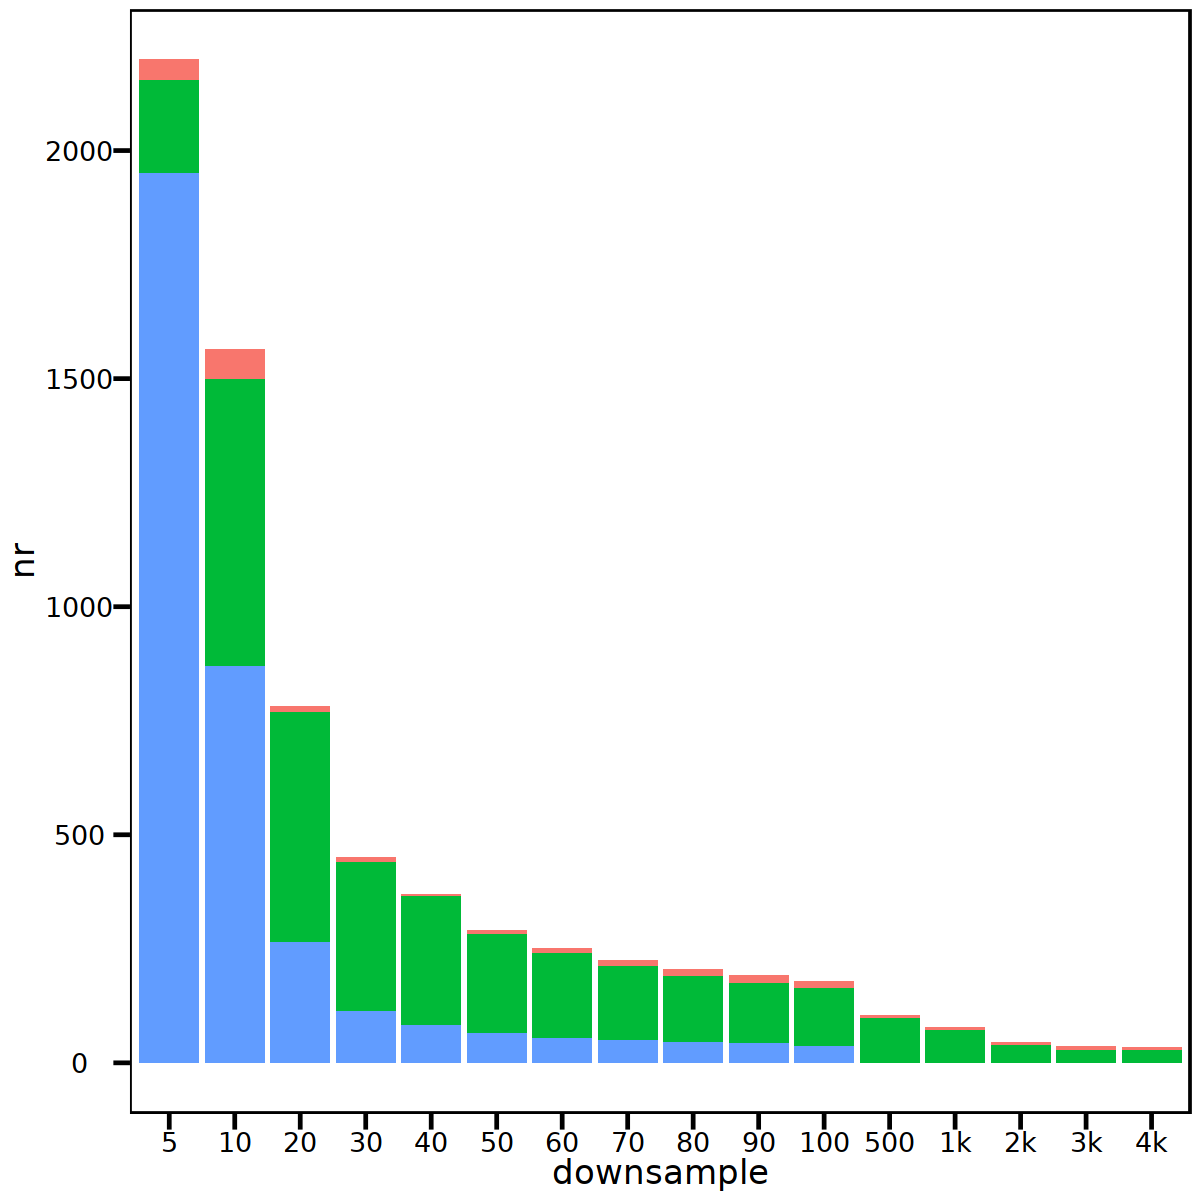

In [280]:
#pdf('downsample_misassigned_cells.pdf')
filtered_barcodes_merged.all.compare %>% filter(girafr.compare == FALSE) %>% group_by(downsample) %>% 
summarise(n = n(), not_found = sum(!detected),
          ratio_not_found = not_found/n, 
          larger =  sum(as.numeric(girafr.5k[which(detected)]) > as.numeric(girafr[which(detected)])), 
          smaller = sum(as.numeric(girafr.5k[which(detected)]) < as.numeric(girafr[which(detected)]))) %>% 
gather(key = 'cate', value = 'nr', -downsample, -ratio_not_found, -n) %>%
ggplot(aes(x = downsample, y = nr, fill = factor(cate, levels = c('smaller','larger', 'not_found'))))+
geom_bar(stat = 'identity')+theme_LFE()+theme(legend.position="none")
# when girafr.compare is TRUE, and detected is FALSE => girafr predict as empty (0)
#dev.off()

rm(gRNA.umi.threshold.all)

In [67]:
gRNA.umi.threshold <- read.table('../Exp2_downsample/5ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '5'
gRNA.umi.threshold.all <- gRNA.umi.threshold
gRNA.umi.threshold <- read.table('../Exp2_downsample/10ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '10'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/20ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '20'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/30ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '30'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/40ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '40'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/50ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '50'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/60ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '60'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/70ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '70'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/80ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '80'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/90ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '90'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/100ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '100'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/500ReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '500'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/1kReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '1k'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/2kReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '2k'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/3kReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '3k'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../Exp2_downsample/4kReadsPerCell/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '4k'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

gRNA.umi.threshold <- read.table('../exp2_deep/re-run/gRNA.umi.threshold.txt', header = FALSE)
gRNA.umi.threshold$downsample <- '5k'
gRNA.umi.threshold.all <- rbind(gRNA.umi.threshold.all, gRNA.umi.threshold)

In [68]:
gRNA.umi.threshold.all$downsample <- factor(gRNA.umi.threshold.all$downsample, 
                                            levels = c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k'))


In [69]:
head(gRNA.umi.threshold.all)

,V1,V2,downsample
,<chr>,<int>,<fct>
1,ATAD2_gRNA1_gene,3,5
2,ATAD2_gRNA2_gene,1,5
3,ATAD2_gRNA4_gene,1,5
4,CHEK1_gRNA1_gene,1,5
5,CHEK1_gRNA2_gene,1,5
6,CHEK1_gRNA3_gene,1,5


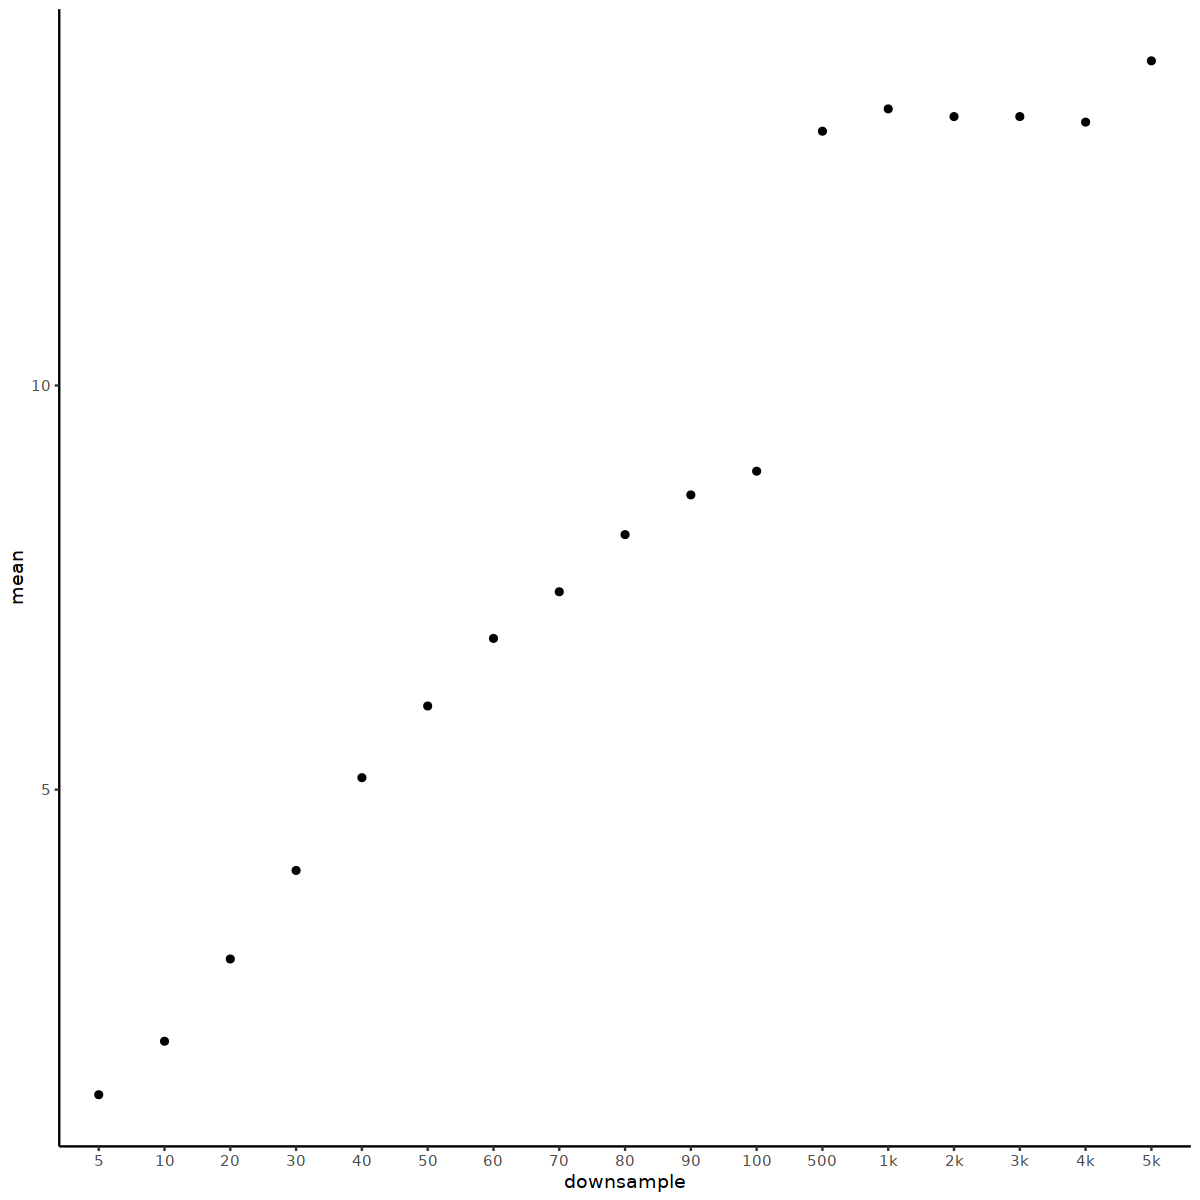

In [89]:
#pdf('downsample_UMI_threshold.pdf')
gRNA.umi.threshold.all %>% group_by(downsample) %>% summarise(mean = mean(V2)) %>%
ggplot(aes(x = downsample, y = mean))+geom_point()+theme_classic()
#dev.off()

In [71]:
avg.gRNA <- lapply(consensus.count.matrix.list, function(x) apply(x[,-1], 1, mean))
for(i in seq(1,22)){
    names(avg.gRNA[[i]]) <- consensus.count.matrix.list[[i]]$gRNA
}
avg.gRNA2<- lapply(avg.gRNA, function(x) x[unique(gRNA.umi.threshold.all$V1)])

In [72]:
avg.gRNA.df <- as.data.frame(do.call(bind_rows, avg.gRNA2))
avg.gRNA.df[is.na(avg.gRNA.df)] <- 0
colnames(avg.gRNA.df) <- sapply(strsplit(colnames(avg.gRNA.df), '\\.'), `[`, 4)
avg.gRNA.df$gRNA <- unique(gRNA.umi.threshold.all$V1)
avg.gRNA.df <- gather(avg.gRNA.df, key = 'downsample', value = 'mean_exp', -gRNA) 

In [73]:
avg.gRNA.df$downsample <- factor(avg.gRNA.df$downsample, 
                                 levels = c('5','10','20','30','40','50','60','70','80','90','100','500','1k','2k','3k','4k','5k'))
avg.gRNA.df <- avg.gRNA.df[which(avg.gRNA.df$downsample %in% 
                 unique(gRNA.umi.threshold.all$downsample)),]

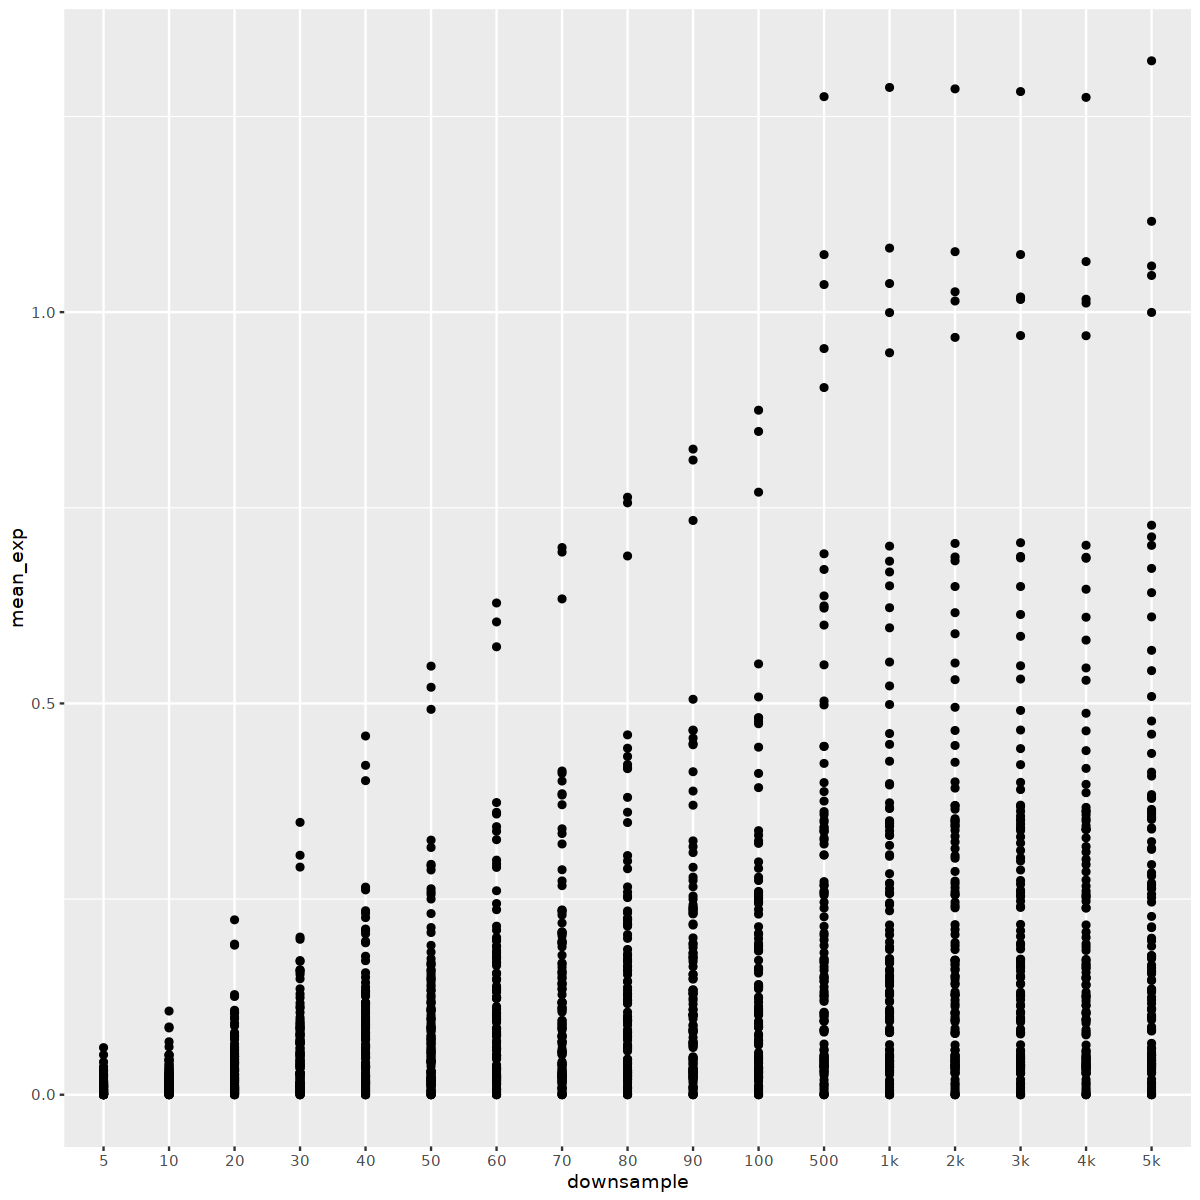

In [74]:
ggplot(avg.gRNA.df, aes(x = downsample, y = mean_exp))+geom_point()

# Impact mutation calling

In [105]:
variant_UMI_sum <- lapply(consensus.count.matrix.list, function(x) sum(rowSums(x[grepl('variant', x[,1]),-1])))
WT_UMI_sum <- lapply(consensus.count.matrix.list, function(x) sum(rowSums(x[!grepl('variant', x[,1]),-1])))

In [126]:
mutation_UMI.df <- data.frame(variant_UMI = unlist(variant_UMI_sum[order_object]), WT_UMI = unlist(WT_UMI_sum[order_object]))
mutation_UMI.df$downsample <- rownames(mutation_UMI.df)

In [137]:
mutation_UMI.df$downsample <- factor(mutation_UMI.df$downsample, levels = c('consensus.count.matrix.5',
                    'consensus.count.matrix.10', 'consensus.count.matrix.20','consensus.count.matrix.30', 
                       'consensus.count.matrix.40', 'consensus.count.matrix.50','consensus.count.matrix.60',
                      'consensus.count.matrix.70', 'consensus.count.matrix.80','consensus.count.matrix.90',
                      'consensus.count.matrix.100', 'consensus.count.matrix.120','consensus.count.matrix.140',
                      'consensus.count.matrix.160', 'consensus.count.matrix.180','consensus.count.matrix.200',
                      'consensus.count.matrix.500', 'consensus.count.matrix.1k','consensus.count.matrix.2k',
                      'consensus.count.matrix.3k', 'consensus.count.matrix.4k','consensus.count.matrix.5k'))

In [284]:
pdf('downsample_UMI.pdf')
mutation_UMI.df[c(1:11,17:22),] %>% gather(key = 'cate', value = 'UMI', -downsample) %>%
ggplot(aes(x = downsample, y = UMI, col = cate, group = cate))+geom_point(size =3)+geom_line(linewidth = 0.8)+theme_classic()+
scale_y_continuous(n.breaks = 20)+theme_LFE()+theme(legend.position="none")
dev.off()

png 
  2

# Scalability

In [99]:
scalability <- read.csv('./scalability.csv', header = TRUE)

In [100]:
scalability$guides <- as.numeric(sub(',','',scalability$guides))
scalability$Reads.per.cell <- as.numeric(sub(',','',scalability$Reads.per.cell))
scalability$Filtered.cells <- as.numeric(sub(',','',scalability$Filtered.cells))
scalability$Cells.found.in.sgRNA.library <- as.numeric(sub(',','',scalability$Cells.found.in.sgRNA.library))
scalability$Reads.per.cell <- scalability$Reads.after.filter/scalability$Cells.found.in.sgRNA.library

In [101]:
scalability$study <- ifelse(grepl('downsample',scalability$ID), 'downsample','other')

In [102]:
scalability$Total.time.without.bam.preparation <- scalability$Total.time.without.bam.preparation * 24
# convert to per hour unit

In [104]:
head(scalability,30)

,ID,guides,sgRNA.reads,Saturation,Filtered.cells,Cells.found.in.sgRNA.library,Reads.after.filter,Prepare.bam.time,Consensus.sequence.time,Mutation.identification.time,Assign.gRNA.time,Total.time.without.bam.preparation,Reads.per.cell,study
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Yu_In House screen,120,"25,289,660",98.90%,5744,5560,24732128,NA,,NA,NA,0.5184,4448.224460,other
2,Schraivogel_NatureMethods sample1,4120,mix,83.60%,5190,5189,10435905,NA,,NA,NA,0.3648,2011.159183,other
3,Schraivogel_NatureMethodssample2,4120,mix,68.70%,8727,8723,7785367,NA,,NA,NA,0.4248,892.510260,other
4,Schraivogel_NatureMethodssample3,4120,mix,73.60%,9449,9445,10044278,NA,,NA,NA,0.4464,1063.449232,other
5,Genga_CellReports DE_TERA_cropseq_rep1,161,"68,988,327",97.40%,10125,9988,66628311,NA,,NA,NA,2.3952,6670.836103,other
6,Genga_CellReports DE_TERA_cropseq_rep2,161,"66,314,614",97.60%,10132,9988,63971037,NA,,NA,NA,1.7952,6404.789447,other
7,Tian_Neuron iPSC_lane1,183,"251,442,935",98.60%,13970,13689,247842462,NA,,NA,NA,10.7616,18105.227701,other
8,Tian_Neuron iPSC_lane2,183,"312,536,349",98.80%,12331,12159,308223348,NA,,NA,NA,13.3872,25349.399457,other
9,Tian_NatureNeuroscience CRISPRi Lane1,374,mix,21.80%,15008,11174,1608783,NA,,NA,NA,0.1968,143.975568,other


In [94]:
pdf('scalability_downsample.pdf')
# scalability %>% filter(study == 'downsample') %>%
# ggplot(aes(x = Reads.per.cell/1000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 0.6)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)

# scalability %>% filter(study == 'downsample') %>%
# ggplot(aes(x = Reads.after.filter/1000000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 0.6)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)


# scalability %>% filter(study == 'downsample') %>%
# ggplot(aes(x = Cells.found.in.sgRNA.library, y = log(Total.time.without.bam.preparation)))+geom_point()+theme_LFE()+
# stat_cor(label.y = 0.6)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)


scalability %>% filter(study == 'downsample') %>%
ggplot(aes(x = Cells.found.in.sgRNA.library*Reads.after.filter/1000000000, 
           y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
stat_cor(label.y = 0.6)

dev.off()

png 
  2

In [98]:
scalability %>% filter(study == 'other') %>% nrow()

[1] 27

In [95]:
pdf('scalability_publicdata.pdf')
# scalability %>% filter(study == 'other') %>% filter(ID != 'Alda-Catalinas_CellSystems Replicate 1') %>%
# ggplot(aes(x = Reads.per.cell/1000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)

# scalability %>% filter(study == 'other') %>% filter(ID != 'Alda-Catalinas_CellSystems Replicate 1') %>%
# ggplot(aes(x = Reads.after.filter/1000000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)

# scalability %>% filter(study == 'other') %>% filter(ID != 'Alda-Catalinas_CellSystems Replicate 1') %>%
# ggplot(aes(x = Cells.found.in.sgRNA.library, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)


# scalability %>% filter(study == 'other') %>% 
# ggplot(aes(x = Reads.per.cell/1000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)

# scalability %>% filter(study == 'other') %>% 
# ggplot(aes(x = Reads.after.filter/1000000, y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)

# scalability %>% filter(study == 'other') %>% 
# ggplot(aes(x = log(Cells.found.in.sgRNA.library), y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
# stat_cor(label.y = 12)+scale_x_continuous(n.breaks = 10)+scale_y_continuous(n.breaks = 10)


scalability %>% filter(study == 'other') %>% 
ggplot(aes(x = Cells.found.in.sgRNA.library*Reads.after.filter/1000000000, 
           y = Total.time.without.bam.preparation))+geom_point()+theme_LFE()+
stat_cor(label.y = 15)


dev.off()

png 
  2